# Logistic
处理分类问题，通过logidtic分布得出回归函数，再通过极大似然估计得出对数似然函数，然后就可以用梯度求似然函数的最大值了。

In [28]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import torch
from torch.autograd import Variable
from torch import nn
from torch import optim

In [29]:
with open('data.txt','r') as f:
    data_list=f.readlines()
    data_list=[i.split('\n')[0] for i in data_list]
    data_list=[i.split(',') for i in data_list]
    data=[(float(i[0]),float(i[1]),float(i[2])) for i in data_list]
    np_data=np.array(data,dtype='float32')
    x_data=torch.from_numpy(np_data[:,0:2])
    y_data=torch.from_numpy(np_data[:,-1]).unsqueeze(1)
    

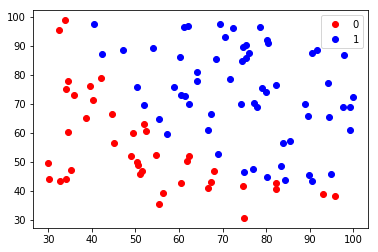

In [30]:
#draw
x0=list(filter(lambda x:x[-1]==0.0,data))
x1=list(filter(lambda x:x[-1]==1.0,data))#分类
plot_x0_x=[i[0] for i in x0]
plot_x0_y=[i[1] for i in x0]
plot_x1_x=[i[0] for i in x1]
plot_x1_y=[i[1] for i in x1]
plt.plot(plot_x0_x,plot_x0_y,'ro',label='0')
plt.plot(plot_x1_x,plot_x1_y,'bo',label='1')
plt.legend(loc='best')

In [31]:
#definite model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.lr=nn.Linear(2,1)
        self.sm=nn.Sigmoid()
    def forward(self,x):
        x=self.lr(x)
        x=self.sm(x)
        return x
model=LogisticRegression()
criterion=nn.BCELoss()#二分类的损失函数 
optimizer=torch.optim.SGD(model.parameters(),lr=1e-3,momentum=0.9)#动量是0.9
for epoch in range(50000):
    new_x=Variable(x_data)
    new_y=Variable(y_data)
    predict=model(new_x)
    loss=criterion(predict,new_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1)%20000==0:
        print('times[{}/{}],loss:{}'.format(epoch+1,50000,loss.data[0]))

times[20000/50000],loss:0.313790887594
times[40000/50000],loss:0.263690650463


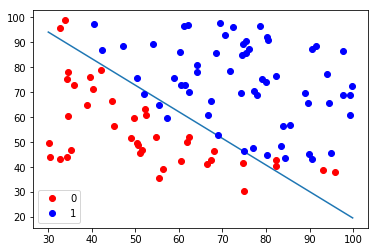

In [33]:
w0,w1=model.lr.weight[0]
w0=w0.data[0]
w1=w1.data[0]
b=model.lr.bias.data[0]
plot_x=np.arange(30,100,0.1)
plot_y=(-w0*plot_x-b)/w1
plt.plot(plot_x,plot_y)
plt.plot(plot_x0_x,plot_x0_y,'ro',label='0')
plt.plot(plot_x1_x,plot_x1_y,'bo',label='1')
plt.legend(loc='best')

plt.show()

### Summary
忘记带书来教室了，回去看看为啥画的线一直是错的。感觉对模型会使用了，但是对含义还是不是很理解，明天看看官方手册。